In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
from astroquery.gaia import Gaia

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
tables = Gaia.load_tables(only_names=True)
for table in (tables):
    print (table.get_qualified_name())

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]
external.external.apassdr9
external.external.gaiadr2_geometric_distance
external.external.galex_ais
external.external.ravedr5_com
external.external.ravedr5_dr5
external.external.ravedr5_gra
external.external.ravedr5_on
external.external.sdssdr13_photoprimary
external.external.skymapperdr1_master
external.external.tmass_xsc
public.public.hipparcos
public.public.hipparcos_newreduction
public.public.hubble_sc
public.public.igsl_source
public.public.igsl_source_catalog_ids
public.public.tycho2
public.public.dual
tap_config.tap_config.coord_sys
tap_schema.tap_schema.columns
tap_schema.tap_schema.key_columns
tap_schema.tap_schema.keys
tap_schema.tap_schema.schemas
tap_schema.tap_schema.tables
gaiadr1.gaiadr1.aux_qso_icrf2_match
gaiadr1.gaiadr1.ext_phot_zero_point
gaiadr1.gaiadr1.allwise_best_neighbour
gaiadr1.gaiadr1.allwise_neighbourhood
gaiadr1.

In [107]:
job2 = Gaia.launch_job_async("SELECT * \
FROM gaiadr2.gaia_source \
WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',230.7875,-36.8586,0.16))=1 \
AND abs(parallax)>3.69 \
AND radial_velocity IS NOT NULL;", dump_to_file=True)

In [108]:
j = job2.get_results()
print (j['source_id']) 

     source_id     
-------------------
6007668552771843072
6007672267920658944
6007664227741846400


In [109]:
x=1000/j['parallax']*np.cos(j['dec']*np.pi/180)*np.cos(j['ra']*np.pi/180)
y=1000/j['parallax']*np.cos(j['dec']*np.pi/180)*np.sin(j['ra']*np.pi/180)
z=1000/j['parallax']*np.sin(j['dec']*np.pi/180)

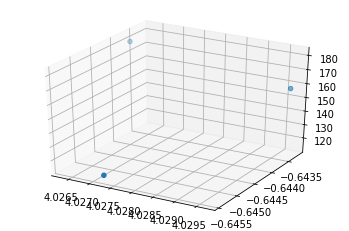

In [110]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(j['ra']*np.pi/180,j['dec']*np.pi/180,1000/j['parallax'])

In [111]:
1000/j['parallax']

180.74171838366198
157.43387927512745
113.94206668840788


In [113]:
j['parallax']

5.532756958065938
6.351872955200611
8.776389871307618


In [114]:
j['radial_velocity']

0.6751104603575069
23.013122130126455
0.6434988076717723


In [115]:
j['ra']

230.69140505107603
230.88317434246966
230.74157505310103


In [116]:
j['dec']

-36.884612374707665
-36.85424868537751
-36.98064766527455
